Quick general overview of how to use Sympy and syntax

In [58]:
#simpy CRSANKDRIVE EQUATIONS
import sympy as smp
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = smp.symbols('x')

In [4]:
x

x

In [5]:
x**2

x**2

In [7]:
y = x**2+4*x+3

In [8]:
y

x**2 + 4*x + 3

In [10]:
z = y**2
z

(x**2 + 4*x + 3)**2

In [11]:
z.factor()

(x + 1)**2*(x + 3)**2

In [12]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In [14]:
smp.solve(z,x) # this will find x, so that z = 0

[-3, -1]

In [15]:
smp. solve(smp.sin(x),x)

[0, pi]

In [16]:
x

x

Now, the equations for the crankdrive will be defined and solved/rearranged

In [150]:
r, l, s, v, a, s_0, s_x, s1 = smp.symbols('r l s v a s_0, s_x s_1')
alpha = smp.symbols(r'\alpha')
lamb = smp.symbols(r'\lambda')
psi = smp.symbols(r'\psi')
phi = smp.symbols(r'\phi')

In [151]:
s_x

s_x

In [152]:
psi = smp.atan(lamb*smp.sin(phi)/smp.sqrt(1-lamb**2*smp.sin(phi)**2))

In [153]:
psi

atan(\lambda*sin(\phi)/sqrt(-\lambda**2*sin(\phi)**2 + 1))

In [154]:
s=r*(1-smp.cos(phi)+(1/lamb)*(1-smp.sqrt(1-lamb**2*smp.sin(phi)**2)))

In [155]:
s

r*(-cos(\phi) + 1 + (1 - sqrt(-\lambda**2*sin(\phi)**2 + 1))/\lambda)

In [156]:
expr_psi = smp.lambdify([lamb, phi], psi)

In [157]:
expr_psi(0.24,0.1577)

0.03770024945377725

In [158]:
lamb_num = 0.288
phi_num = np.linspace(0,3.14159*2,100)

In [159]:
lamb_num

0.288

In [160]:
phi_num

array([0.        , 0.06346646, 0.12693293, 0.19039939, 0.25386586,
       0.31733232, 0.38079879, 0.44426525, 0.50773172, 0.57119818,
       0.63466465, 0.69813111, 0.76159758, 0.82506404, 0.88853051,
       0.95199697, 1.01546343, 1.0789299 , 1.14239636, 1.20586283,
       1.26932929, 1.33279576, 1.39626222, 1.45972869, 1.52319515,
       1.58666162, 1.65012808, 1.71359455, 1.77706101, 1.84052747,
       1.90399394, 1.9674604 , 2.03092687, 2.09439333, 2.1578598 ,
       2.22132626, 2.28479273, 2.34825919, 2.41172566, 2.47519212,
       2.53865859, 2.60212505, 2.66559152, 2.72905798, 2.79252444,
       2.85599091, 2.91945737, 2.98292384, 3.0463903 , 3.10985677,
       3.17332323, 3.2367897 , 3.30025616, 3.36372263, 3.42718909,
       3.49065556, 3.55412202, 3.61758848, 3.68105495, 3.74452141,
       3.80798788, 3.87145434, 3.93492081, 3.99838727, 4.06185374,
       4.1253202 , 4.18878667, 4.25225313, 4.3157196 , 4.37918606,
       4.44265253, 4.50611899, 4.56958545, 4.63305192, 4.69651

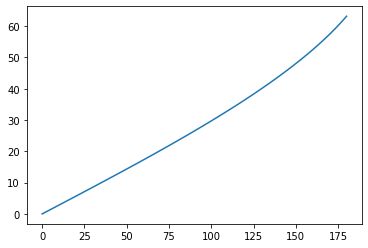

In [161]:
plt.plot(phi_num/2*57.3, expr_psi(phi_num/2, lamb_num)*57.3)
plt.show()

In [162]:
s1 = r*(1-smp.cos(phi)+smp.Rational(1/2)*lamb*smp.sin(phi)**2)
s1

r*(\lambda*sin(\phi)**2/2 - cos(\phi) + 1)

In [163]:
expr_s1 = smp.lambdify([r, lamb, phi], s1)

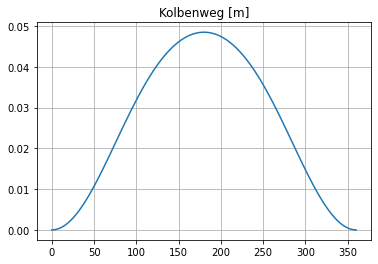

In [164]:
plt.plot(phi_num*57.3, expr_s1(0.02425, 0.288, phi_num))
plt.title('Kolbenweg [m]')
plt.grid()
plt.show()

In [165]:
v1 = smp.diff(s1, phi)
v1

r*(\lambda*sin(\phi)*cos(\phi) + sin(\phi))

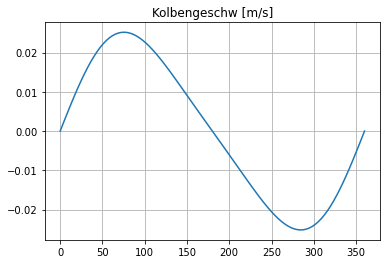

In [166]:
expr_v1 = smp.lambdify([r, lamb, phi], v1)
plt.plot(phi_num*57.3, expr_v1(0.02425, 0.288, phi_num))
plt.title('Kolbengeschw [m/s]')
plt.grid()
plt.show()

In [167]:
a1 = smp.diff(v1, phi)
a1

r*(-\lambda*sin(\phi)**2 + \lambda*cos(\phi)**2 + cos(\phi))

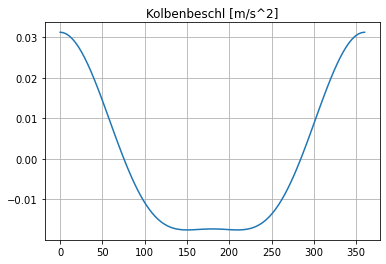

In [168]:
expr_a1 = smp.lambdify([r, lamb, phi], a1)
plt.plot(phi_num*57.3, expr_a1(0.02425, 0.288, phi_num))
plt.title('Kolbenbeschl [m/s^2]')
plt.grid()
plt.show()

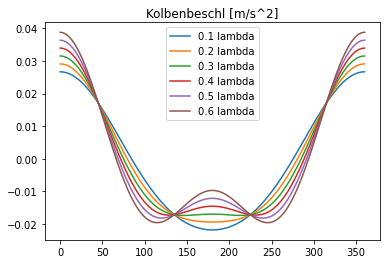

In [194]:
expr_a1 = smp.lambdify([r, lamb, phi], a1)
plt.figure(1)
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    
    plt.plot(phi_num*57.3, expr_a1(0.02425, i, phi_num), label='%s lambda' % i)
    plt.title('Kolbenbeschl [m/s^2]')
    plt.grid()
    #plt.legend([i], loc='lower right')
    #plt.plot(xs,dct['list_%s' %i], label='%s data' % i)
    plt.legend()
plt.show() #must be outside the loop for superposition of Plots

In [170]:
#Desaxierung und Schränkung

In [171]:
#Kräfte im Kurbeltrieb